# Lesson 7 - Parkinson PCR

## Author - Yulia Zubova

### Description:

Perform Principal Component Regression on a <a href="https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring">dataset that tracked patients with Parkinson's Disease</a>.

Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson's disease progression by non-invasive speech tests',
IEEE Transactions on Biomedical Engineering.

About the data:
This dataset is composed of a range of biomedical voice measurements from 42 
people with early-stage Parkinson's disease recruited to a six-month trial of 
a telemonitoring device for remote symptom progression monitoring. The 
recordings were automatically captured in the patient's homes.

#### Instructions:

 1. Load the dataset.
 2. Create the X-matrix (one-hot encoding categorical factors).
 3. Scale the X-matrix.
 4. Create the principal components and do a simple plot of the explained variance.
 5. PCR - Linear regression with the principal components.

Report on:

 1. Number of components before and after (choose a smaller number of principal components and explain how you chose them).
 2. Interpret the adjusted R-squared.

In [62]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

In [63]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [64]:
#Load dataset
parkinsons_df = pd.read_csv(filename)
parkinsons_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [65]:
#information about dataset
parkinsons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

In [66]:
# Define the target and features:
target_label = 'total_UPDRS'
non_features = ['subject#', 'age','sex', 'test_time', 'motor_UPDRS']
feature_labels = [x for x in parkinsons_df.columns if x not in [target_label] + non_features]
# Filter out non-features and non-targets
parkinsons_df = parkinsons_df.drop(non_features, axis=1)
#parkinsons_df = parkinsons_df[feature_labels]


The target is total Unified Parkinson's disease rating scale, which is based on others features.
We excluded some features from dataset because they doesn't really matter (as subject#) or they related with other features.

In [7]:
print('DataFrame shape: {}'.format(parkinsons_df.shape))

DataFrame shape: (5875, 17)


In [67]:
# Perform One-hot encode inputs
parkinsons_expanded = pd.get_dummies(parkinsons_df, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(parkinsons_expanded.shape))

# Get target and original x-matrix (features)
y = parkinsons_expanded[target_label]
X = parkinsons_expanded.as_matrix(columns=feature_labels)

parkinsons_expanded.head()

DataFrame one-hot-expanded shape: (5875, 17)


,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [68]:
# Scale function
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [69]:
# Scaling matrix of features using function np.apply_along_axis (applying function scale() to columns)
#x_scaled = np.apply_along_axis(scale, 1, X)
x_scaled = StandardScaler().fit_transform(X)

# Scaling y-target
y_scaled = scale(y)

In [70]:
# Calculating principal components
pca = PCA(n_components=len(feature_labels))
pca_result = pca.fit_transform(x_scaled)

column_names = ['pc' + str(ix+1) for ix in range(x_scaled.shape[1])]
pca_df = pd.DataFrame(data = pca_result, columns=column_names)
pca_df[target_label] = y_scaled

In [71]:
pca_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,total_UPDRS
0,-0.978108,-0.057540,1.760088,-0.049483,-0.476558,0.376887,-0.561067,0.635614,0.339977,0.039112,-0.027261,-0.024319,0.001029,0.031725,0.000752,0.000007,0.502745
1,-2.601857,0.553154,1.487455,0.058596,0.066572,0.170468,0.215560,-0.165989,0.122985,-0.018919,-0.003925,0.052872,-0.011968,0.024268,-0.000761,-0.000007,0.549103
2,-1.939773,-0.115513,1.205962,-0.687477,-0.856751,-0.136187,-0.139529,0.228277,0.088253,0.041748,-0.079120,-0.015546,-0.059301,-0.002890,0.000743,0.000004,0.595367
3,-1.022993,-0.103017,0.533406,-0.508542,-1.541859,-0.189726,0.583599,-0.088389,-0.618057,0.102112,-0.265533,-0.024285,0.001197,-0.182390,-0.000022,0.000180,0.634716
4,-2.475704,0.230181,0.960314,-0.476941,-0.604783,-0.080478,0.417343,-0.175978,0.016228,0.004227,-0.036416,0.009636,-0.068263,0.004084,-0.000762,0.000172,0.687522


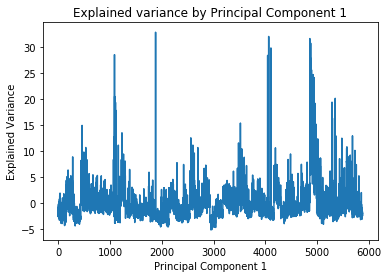

In [72]:
# Plot the explained variance for first principal component
#It's bigger, that's why it's shown separatly
plt.plot(pca_df.loc[:, 'pc1'])
plt.title('Explained variance by Principal Component 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Explained Variance')
plt.show()

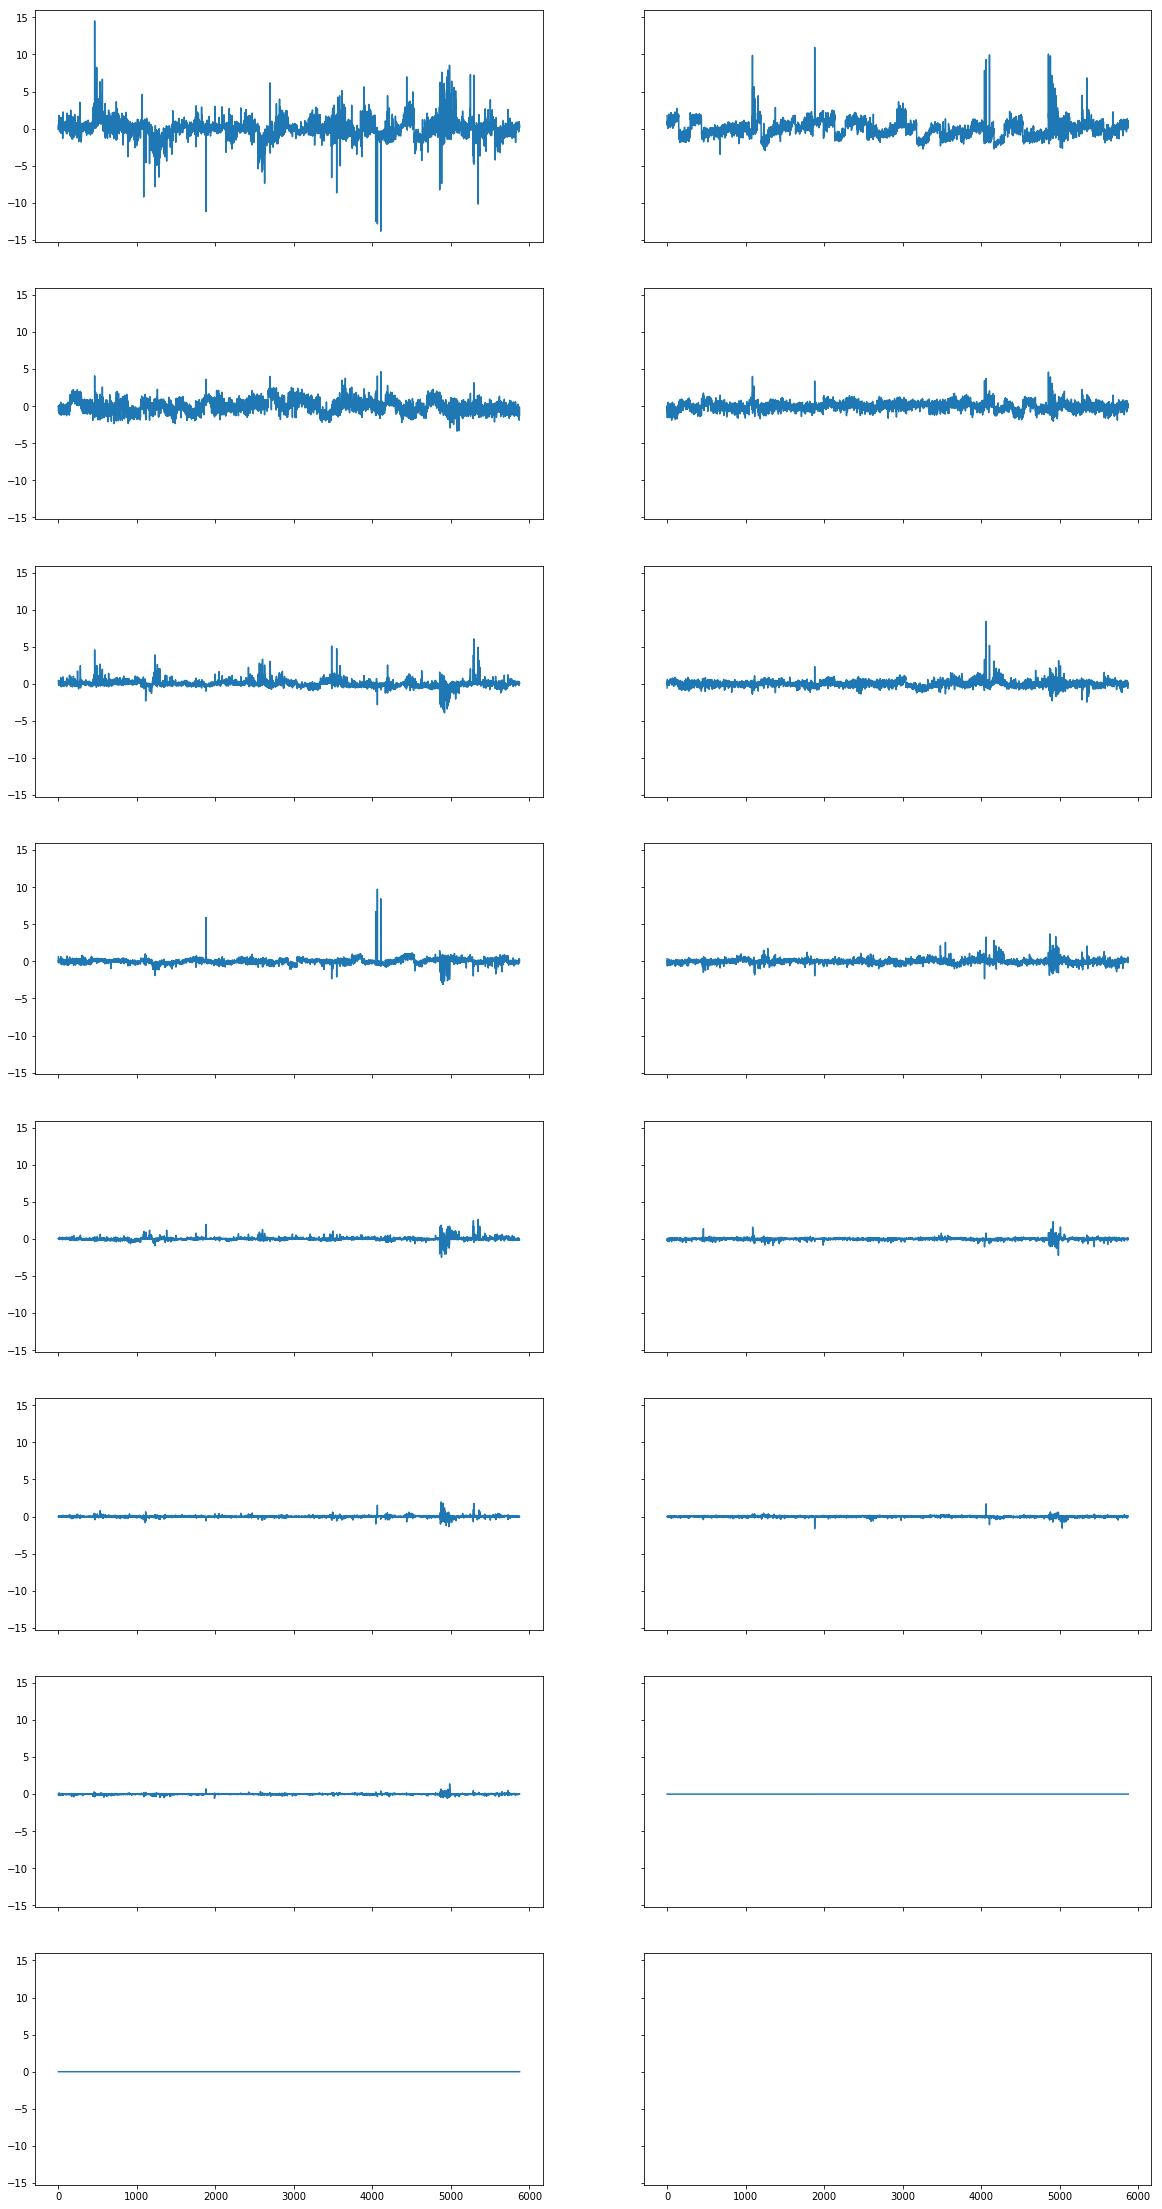

In [73]:
# Plot the explained variance for other 15 principal components

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15, ax16) ) = plt.subplots(8, 2, sharex=True, sharey=True, figsize = (20,40))
                                                                                                                             
ax1.plot(pca_df.loc[:, 'pc2'])
#ax1.title('Explained variance by Principal Component 2')

ax2.plot(pca_df.loc[:, 'pc3'])
#ax2.title('Explained variance by Principal Component 3')

ax3.plot(pca_df.loc[:, 'pc4'])
#ax3.title('Explained variance by Principal Component 4')

ax4.plot(pca_df.loc[:, 'pc5'])
#ax4.title('Explained variance by Principal Component 5')

ax5.plot(pca_df.loc[:, 'pc6'])
#ax5.title('Explained variance by Principal Component 6')

ax6.plot(pca_df.loc[:, 'pc7'])
#ax6.title('Explained variance by Principal Component 7')

ax7.plot(pca_df.loc[:, 'pc8'])
#ax7.title('Explained variance by Principal Component 8')

ax8.plot(pca_df.loc[:, 'pc9'])
#ax8.title('Explained variance by Principal Component 9')

ax9.plot(pca_df.loc[:, 'pc10'])
#ax9.title('Explained variance by Principal Component 10')

ax10.plot(pca_df.loc[:, 'pc11'])
#ax10.title('Explained variance by Principal Component 11')

ax11.plot(pca_df.loc[:, 'pc12'])
#ax11.title('Explained variance by Principal Component 12')

ax12.plot(pca_df.loc[:, 'pc13'])
#ax12.title('Explained variance by Principal Component 13')

ax13.plot(pca_df.loc[:, 'pc14'])
#ax13.title('Explained variance by Principal Component 14')

ax14.plot(pca_df.loc[:, 'pc15'])
#ax14.title('Explained variance by Principal Component 15')

ax15.plot(pca_df.loc[:, 'pc16'])
#ax5.title('Explained variance by Principal Component 16')


plt.show()

On the plots we see that explained variance is the largest for the first principal component, and it becames less for every following component.

In [74]:
print(pca.explained_variance_)
print(pca.components_)

[  1.12629682e+01   1.67318476e+00   1.24072101e+00   7.64997339e-01
   3.09303033e-01   2.22920126e-01   1.72792228e-01   1.61771857e-01
   1.03092483e-01   4.35311730e-02   2.02908815e-02   1.40172168e-02
   8.66818249e-03   4.46498205e-03   3.77897603e-07   2.08498997e-08]
[[  2.66680761e-01   2.49630961e-01   2.58814463e-01   2.64846957e-01
    2.58815853e-01   2.78514626e-01   2.78807570e-01   2.69096387e-01
    2.74501569e-01   2.61648539e-01   2.69095967e-01   2.58389879e-01
   -2.56668739e-01   1.67337269e-01   7.04006974e-02   2.30018365e-01]
 [ -2.94844179e-01  -3.04666661e-01  -3.08566095e-01  -2.28675347e-01
   -3.08567056e-01   2.60693870e-01   2.49778241e-01   2.87033112e-01
    2.72473999e-01   2.62470131e-01   2.87034304e-01  -8.65097640e-03
   -5.30603460e-02  -3.59628846e-02  -2.97479980e-01  -2.15843319e-01]
 [  1.82339680e-01  -7.96501958e-02   2.18903790e-01   2.40635185e-01
    2.18897596e-01   1.26286346e-03   1.22880779e-03  -1.13779298e-02
    9.75621820e-03  -

Interpretation: the first  principal component explains 11.26 units of the variance. The second component explains the remaining 1.67 units of variance, the third - 1.24 units, etc.

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     71.84
Date:                Wed, 16 May 2018   Prob (F-statistic):          2.42e-126
Time:                        22:18:47   Log-Likelihood:                -8029.1
No. Observations:                5875   AIC:                         1.608e+04
Df Residuals:                    5865   BIC:                         1.614e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.38e-15      0.012  -3.53e-13      1.0

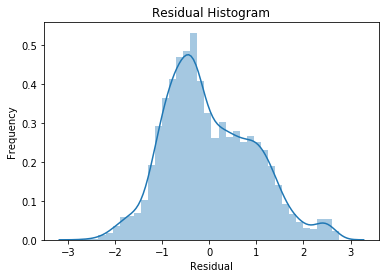

In [75]:
# Perform linear regression with the first 9 columns
n = 9 #number of PCA that I'm going to use
formula_start = target_label + ' ~ '   # y ~
formula_terms = ['pc' + str(x+1) for x in range(n)] #add features to formula
formula_end = ' + '.join(formula_terms)
formula_final = formula_start + formula_end

#Initialize linear regression model based on chosen amount PCA
pcr_model = sm.ols(formula = formula_final, data=pca_df) 

#Fit model to data
results = pcr_model.fit()

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

plt.show()

## SUMMARY ##

In this Assignment 7:

1. Was created and scaled X-matrix.
2. Were created the principal components and presented plots of the explained variance.
3. Was perform linear regression with the principal components.

4. According our dataset (after some manipulation in the very beginning) we had 16 features and 1 target variable.
So in the beginning  we had 16 principal components.
For performing linear regression I've choosen 9 of them, because in this case all components are significantly important (p-value < 0.5).
And also model provide pretty good predictions (according residuals plot, mean value for residuals is about zero).

I tried different number of PCA:
* n = 2, $R^2_{adj}$ = 0.011
* n = 5, $R^2_{adj}$ = 0.075
* n = 9, $R^2_{adj}$ = 0.098
* n = 16, $R^2_{adj}$ = 0.098.
So increasing of number of principal more then 9 doesn't provide any effort 


5.  $R^2$ and $R^2_{adj}$ show fraction of the variance of the original data explained by the model (the difference is that $R^2_{adj}$ is bias adjusted for degrees of freedom). In our case $R^2_{adj}$ shows how coefficients that we've got performing linear regression for principal components describe the model.

In our case $R^2_{adj}$ is very low with any number of PCA. I would suggest that it's because there is a high level of collinearity between some features.